<a href="https://colab.research.google.com/github/AdersonLongo/DevBlockchain/blob/main/Trab1_redes_neurais_Aderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np

dic_entrada = {'qtde_entrada': 2, 'qtde_saida': 1 }
peso_ent_camada_oculta = []
peso_cam_oculta_saida = []
soma_cam_oculta = [0, 0, 0, 0]

In [77]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 1, 1, 0]

In [35]:
X[0][0]

0

In [78]:
tx_aprend = float(input(print ("Entre com taxa de aprendizagem: ")))
nr_epocas = int(input(print ("Entre com o número de épocas: ")))
qtde_nos_escondidos = int(input(print ("Entre com a qtde de nós da camada escondida: ")))

Entre com taxa de aprendizagem: 
None0.01
Entre com o número de épocas: 
None10000
Entre com a qtde de nós da camada escondida: 
None4


In [23]:
def calc_func_sigmoide (x):

  return 1 / (1 + np.exp(-x))


In [24]:
def calc_derivada_parcial (x):
  return x * (1-x)

In [79]:
# Inicialização dos pesos\n",
def inic_pesos(qtde_nos_escondidos, qtde_entrada, qtde_saida):
    peso_ent_camada_oculta = np.random.rand(qtde_entrada, qtde_nos_escondidos)
    peso_cam_oculta_saida = np.random.rand(qtde_nos_escondidos, qtde_saida)
    peso_ent_camada_oculta = np.random.rand(qtde_entrada, qtde_nos_escondidos)
    peso_cam_oculta_saida = np.random.rand(qtde_nos_escondidos, qtde_saida)
    return peso_ent_camada_oculta, peso_cam_oculta_saida

In [86]:
qtd_ent = dic_entrada['qtde_entrada']
qtd_saida = dic_entrada['qtde_saida']
type(qtd_saida)
peso_ent_camada_oculta, peso_cam_oculta_saida = inic_pesos(qtde_nos_escondidos, qtd_ent, qtd_saida)
#print (peso_ent_camada_oculta, peso_cam_oculta_saida)

In [88]:
soma_cam_oculta


[0, 0, 0, 0]

In [97]:
print ('len(X): ', len(X))
print ('dic_entrada[qtde_entrada]: ', dic_entrada['qtde_entrada'])
print ('qtde_nos_escondidos: ', qtde_nos_escondidos)
print ('peso_ent_camada_oculta: ', peso_ent_camada_oculta)
print ('soma_cam_oculta: ', soma_cam_oculta)
for i in range(len(X)):
    print ('loop do i = tam do X')
    for n in range(dic_entrada['qtde_entrada']-1):
        print ('loop do n que é a qtde de entradas')
        soma = 0
        for e in range(qtde_nos_escondidos):
            print ('i: ', i)
            print ('n: ', n)
            print ('e: ', e)
            print ('X [', i, '][', n, ']:', X[i][n])
            print ('peso_ent_camada_oculta [', i, '][', e, ']:', peso_ent_camada_oculta[i][e])
            soma += X[i][n] * peso_ent_camada_oculta[i, e]
            print ('soma: ', soma)
            txt = input(print ("Digite algo "))
            if e+1 == qtde_nos_escondidos:
                txt = input(print ("Entrou no e == qtde_nos_escond / [n]", n))
                soma_cam_oculta[n] = soma
                print ('soma_cam_oculta [', n, ']: ', soma_cam_oculta)

len(X):  4
dic_entrada[qtde_entrada]:  2
qtde_nos_escondidos:  4
peso_ent_camada_oculta:  [[0.9227905  0.43979658 0.24441273 0.94057898]
 [0.69167214 0.40798512 0.2361914  0.89058045]]
soma_cam_oculta:  [0.0, 0, 0, 0]
i:  0
n:  0
e:  0
X [ 0 ][ 0 ]: 0
peso_ent_camada_oculta [ 0 ][ 0 ]: 0.9227905044411764
soma:  0.0
Digite algo 
None
i:  0
n:  0
e:  1
X [ 0 ][ 0 ]: 0
peso_ent_camada_oculta [ 0 ][ 1 ]: 0.43979658301054436
soma:  0.0
Digite algo 
None
i:  0
n:  0
e:  2
X [ 0 ][ 0 ]: 0
peso_ent_camada_oculta [ 0 ][ 2 ]: 0.24441273187914814
soma:  0.0
Digite algo 
None
i:  0
n:  0
e:  3
X [ 0 ][ 0 ]: 0
peso_ent_camada_oculta [ 0 ][ 3 ]: 0.9405789789288362
soma:  0.0
Digite algo 
None
Entrou no e == qtde_nos_escond / [n] 0
None
soma_cam_oculta [ 0 ]:  [0.0, 0, 0, 0]
i:  1
n:  0
e:  0
X [ 1 ][ 0 ]: 0
peso_ent_camada_oculta [ 1 ][ 0 ]: 0.6916721445853756
soma:  0.0
Digite algo 
None
i:  1
n:  0
e:  1
X [ 1 ][ 0 ]: 0
peso_ent_camada_oculta [ 1 ][ 1 ]: 0.4079851228959315
soma:  0.0
Digite algo 


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
def calc_back(X, peso_ent_camada_oculta, peso_cam_oculta_saida, output):
    # Backpropagation
    output_error = y - output
    output_delta = output_error * calc_derivada_parcial(output)

    hidden_error = output_delta.dot(peso_cam_oculta_saida.T)
    erro_saida = hidden_error * calc_derivada_parcial(hidden_output)
    if epoch % 1000 == 0:
        print(f'Error: {np.mean(np.abs(y - output)):.4f}')

    # Atualizando os pesos da camada de saída
    delta_output = output_error * calc_derivada_parcial(output)
    peso_cam_oculta_saida += np.dot(hidden_output.T, delta_output) * learning_rate

    # Calculando o erro na camada oculta
    hidden_error = np.dot(delta_output, peso_cam_oculta_saida.T)

    # Atualizando os pesos da camada oculta
    delta_hidden = hidden_error * calc_derivada_parcial(hidden_output)
    peso_ent_camada_oculta += np.dot(X.T, delta_hidden) * learning_rate


In [ ]:
def calc_fluxo_ida(X, peso_ent_camada_oculta, peso_cam_oculta_saida):
    # Camada oculta
    # Calcula para cada nó o
    hidden_input = np.dot(X, peso_ent_camada_oculta)
    hidden_output = calc_func_sigmoide(hidden_input)

    output_input = np.dot(hidden_output, peso_cam_oculta_saida) #hidden_output.T.dot(hidden_output) #np.dot(hidden_output, weights_hidden_output) #hidden_output@weights_hidden_output
    output = calc_func_sigmoide(output_input)
#    calc_back(X, peso_ent_camada_oculta, peso_cam_oculta_saida, output)
#    saida = [output, hidden_output]
#    return saida

#def calc_back(X, peso_ent_camada_oculta, peso_cam_oculta_saida, output):
    # Backpropagation
    output_error = y - output
    output_delta = output_error * calc_derivada_parcial(output)

    hidden_error = output_delta.dot(peso_cam_oculta_saida.T)
    erro_saida = hidden_error * calc_derivada_parcial(hidden_output)
    if epoch % 1000 == 0:
        print(f'Error: {np.mean(np.abs(y - output)):.4f}')

    # Atualizando os pesos da camada de saída
    delta_output = output_error * calc_derivada_parcial(output)
    peso_cam_oculta_saida += np.dot(hidden_output.T, delta_output) * tx_aprend

    # Calculando o erro na camada oculta
    hidden_error = np.dot(delta_output, peso_cam_oculta_saida.T)

    # Atualizando os pesos da camada oculta
    delta_hidden = hidden_error * calc_derivada_parcial(hidden_output)
    peso_ent_camada_oculta += np.dot(X.T, delta_hidden) * tx_aprend

    saida = [output, hidden_output]
    return saida


In [ ]:

for epoca in range(nr_epocas):
    # Feedforward
    hidden_input = np.dot(X, peso_ent_camada_oculta)
    hidden_output = calc_func_sigmoide(hidden_input)
    output_input = np.dot(hidden_output, peso_cam_oculta_saida)
    output = calc_func_sigmoide(output_input)

    # Backpropagation
    output_error = y - output
    output_delta = output_error * calc_derivada_parcial(output)

    hidden_error = output_delta.dot(peso_cam_oculta_saida.T)
    hidden_delta = hidden_error * calc_derivada_parcial(hidden_output)

    # Atualização dos pesos
    peso_cam_oculta_saida += hidden_output.T.dot(output_delta) * tx_aprend
    peso_ent_camada_oculta += X.T.dot(hidden_delta) * tx_aprend

    # Testando a rede neural treinada
    hidden_layer = calc_func_sigmoide(np.dot(X, peso_ent_camada_oculta))
    output_layer = calc_func_sigmoide(np.dot(hidden_layer, peso_cam_oculta_saida))

print("Output da rede neural após treinamento:")
print(output_layer)

ValueError: shapes (4,4) and (1,3) not aligned: 4 (dim 1) != 1 (dim 0)

In [ ]:
# Para cada epoca, calcula o

for epoca in range(nr_epocas):
#    saida = calc_fluxo_ida(X, peso_ent_camada_oculta, peso_cam_oculta_saida)
#    print ('saida[0]: ', saida[0])
    #calc_fluxo_volta(X, y, tx_aprend, peso_ent_camada_oculta, peso_cam_oculta_saida)
    # Camada oculta
    # Calcula para cada nó o
    hidden_input = np.dot(X, peso_ent_camada_oculta)
    hidden_output = calc_func_sigmoide(hidden_input)

    output_input = np.dot(hidden_output, peso_cam_oculta_saida) #hidden_output.T.dot(hidden_output) #np.dot(hidden_output, weights_hidden_output) #hidden_output@weights_hidden_output
    output = calc_func_sigmoide(output_input)

#    calc_back(X, peso_ent_camada_oculta, peso_cam_oculta_saida, output)
#    saida = [output, hidden_output]
#    return saida

#def calc_back(X, peso_ent_camada_oculta, peso_cam_oculta_saida, output):
    # Backpropagation
    output_error = y - output
    output_delta = output_error * calc_derivada_parcial(output)

    hidden_error = output_delta.dot(peso_cam_oculta_saida.T)
    erro_saida = hidden_error * calc_derivada_parcial(hidden_output)
    if epoch % 1000 == 0:
        print(f'Error: {np.mean(np.abs(y - output)):.4f}')

    # Atualizando os pesos da camada de saída
    delta_output = output_error * calc_derivada_parcial(output)
    peso_cam_oculta_saida += np.dot(hidden_output.T, delta_output) * tx_aprend

    # Calculando o erro na camada oculta
    hidden_error = np.dot(delta_output, peso_cam_oculta_saida.T)

    # Atualizando os pesos da camada oculta
    delta_hidden = hidden_error * calc_derivada_parcial(hidden_output)
    peso_ent_camada_oculta += np.dot(X.T, delta_hidden) * tx_aprend

    saida = [output, hidden_output]
    if epoca % 1000 == 0:
        print(f'Error: {np.mean(np.abs(y - saida[0])):.4f}')

print("Saída depois do treinamento:")
print(saida[0], "\n")
print ("Pesos entre camada de entrada e ocultas: ", peso_ent_camada_oculta, "\n")
print ("Pesos entre camadas e de saída: ", peso_cam_oculta_saida, "\n")

ValueError: shapes (4,4) and (1,3) not aligned: 4 (dim 1) != 1 (dim 0)

Foi considerada a seguinte sequência de passos:
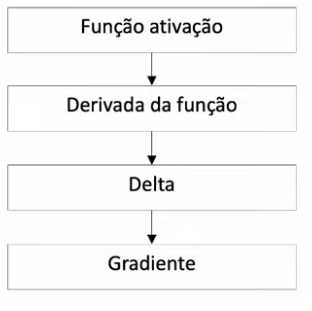

![image.png](
  
)


Os dados de entrada são passados pela rede, primeiro multiplicando pelos pesos da camada de entrada para a oculta e aplicando a função de ativação sigmoid, e depois multiplicando pelos pesos da camada oculta para a saída e aplicando novamente a função de ativação sigmoid.

In [37]:
import numpy as np
dic_entrada = {'qtde_entrada': 2, 'qtde_saida': 1 }
print ("qtde_entrada: ", dic_entrada['qtde_entrada'])

# Função de ativação sigmoide
def calc_func_sigmoide(x):
  return 1 / (1 + np.exp(-x))

# Função de derivada para a direção de atualização dos pesos
def calc_derivada_parcial(x):
  return x * (1-x)

# Funçao Soma
def Soma(X ):

  print ('len(X): ', len(X))
  print ('dic_entrada[qtde_entrada]: ', dic_entrada['qtde_entrada'])
  print ('qtde_nos_escondidos: ', qtde_nos_escondidos)
  for i in range(len(X)):
      print ('i: ', i)
      for n in range(qtde_nos_escondidos):
          soma = 0
          print ('n: ', n)
          tx_aprend = input(print ("Digite algo "))
          for e in range(dic_entrada['qtde_entrada']):
              print ('e: ', e)
              soma += X[i][n] * peso_ent_camada_oculta[i, n]
              print ('soma: ', soma)
              print ('n: ', n)


# Dados de entrada e saída para o problema XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Inicialização dos pesos
tx_aprend = float(input(print ("Entre com taxa de aprendizagem: ")))
nr_epocas = int(input(print ("Entre com o número de épocas: ")))
qtde_nos_escondidos = int(input(print ("Entre com a qtde de nós da camada escondida: ")))

# Peso entre as entradas e a camada oculta
peso_ent_camada_oculta = np.random.rand(dic_entrada['qtde_entrada'], qtde_nos_escondidos)
# Peso entre a camada oculta e a saída
peso_cam_oculta_saida = np.random.rand(qtde_nos_escondidos, dic_entrada['qtde_saida'])

# Para cada epoca
for epoca in range(nr_epocas):

    # Calcula soma da camada de entrada
    vet_soma = Soma(X)

    # Calcula a função sigmoide para a camada oculta
    vetor_ent_sigmoide = np.dot(X, peso_ent_camada_oculta)
    #print ('vetor_ent_sigmoide: ', vetor_ent_sigmoide)
    vetor_saida_sigmoide = calc_func_sigmoide(vetor_ent_sigmoide)
    #print ('vetor_saida_sigmoide: ', vetor_saida_sigmoide)

    # Utiliza a função .dot do numpy para gerar um número para o cálculo da função Sigmoide
    entrada_func_sig = np.dot(vetor_saida_sigmoide, peso_cam_oculta_saida)
    vet_resultado_sigmoide = calc_func_sigmoide(entrada_func_sig)
    #print ("Resultado: ", vet_resultado_sigmoide)

    # Calcula o erro entre o resultado esperado e o resultado obtido
    erro = y - vet_resultado_sigmoide
    #print ("erro: ", erro)

    saida = vet_resultado_sigmoide
    # Imprime o valor do erro ao longo do treinamento a cada 1000
    if epoca % 1000 == 0:
        print(f'Valor do erro: {np.mean(np.abs(y - vet_resultado_sigmoide)):.4f}')

    # Calcula o parametro Delta considerando a camada de saída
    param_delta_saida = erro * calc_derivada_parcial(vet_resultado_sigmoide)
    #print ("param_delta_saida: ", param_delta_saida)

    # Utilizo a função .dot do numpy para gerar um número para o cálculo da função Sigmoide para o cálculo do delta da camada oculta
    erro_cam_oculta = param_delta_saida.dot(peso_cam_oculta_saida.T)
    #print ('erro_cam_oculta:', erro_cam_oculta)

    # Calcula o parametro Delta considerando a camada oculta
    param_delta_oculta = np.matmul(erro_cam_oculta, calc_derivada_parcial(vetor_saida_sigmoide))    #hidden_error * calc_derivada_parcial(vetor_saida_sigmoide)
    #print ('param_delta_oculta:', param_delta_oculta)

    # Atualização dos pesos com Recalcula os pesos de acordo com o resultado da função delta que indica a direção de ajuste dos pesos (delta)
    peso_cam_oculta_saida += vetor_saida_sigmoide.T.dot(param_delta_saida) * tx_aprend
    peso_ent_camada_oculta += X.T.dot(param_delta_oculta) * tx_aprend

    # Testando a rede neural treinada
    vetor_ent_sigmoide = calc_func_sigmoide(np.dot(X, peso_ent_camada_oculta))
    vetor_saida_sigmoide = calc_func_sigmoide(np.dot(vetor_ent_sigmoide, peso_cam_oculta_saida))

print("Resultado da rede neural após treinamento de ", nr_epocas, " época(s): ")
print (vet_resultado_sigmoide)
print ("Peso_ent_camada_oculta: ", peso_ent_camada_oculta)
print ("Peso_cam_oculta_saida: ", peso_cam_oculta_saida)

qtde_entrada:  2
Entre com taxa de aprendizagem: 
None0.2
Entre com o número de épocas: 
None100
Entre com a qtde de nós da camada escondida: 
None4
len(X):  4
dic_entrada[qtde_entrada]:  2
qtde_nos_escondidos:  4
i:  0
n:  0
Digite algo 
None
e:  0
soma:  0.0
n:  0
e:  1
soma:  0.0
n:  0
n:  1
Digite algo 
None
e:  0
soma:  0.0
n:  1
e:  1
soma:  0.0
n:  1
n:  2
Digite algo 
None
e:  0


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
print("Shape of output_delta:", output_delta.shape, output_delta)
print("Shape of peso_cam_oculta_saida.T:", peso_cam_oculta_saida.T.shape, peso_cam_oculta_saida)